# Homework #1
資工四 410485002 胡孝德

In [2]:
from image_processing import *

%matplotlib inline

## Chapter 2 Exercise

**5. Pick a gray sacle image, say `cameraman.png` or `wombats.png`. Using the `imwrite` function, write it to files of type JPEG, PNG, and BMP.**

**What are the sizes of those files?**

In [3]:
name = ["cameraman", "wombats"]

for i, image in enumerate([cameraman, wombats]):
    for ext in ["jpg", "png", "bmp"]:
        imsave(f"{name[i]}.{ext}", image)

The size of wombats.jpg, wombats.png, wombats.bmp are 17 kB, 51 KB, 65 kB

In [4]:
!exiftool save/wombats.jpg | grep 'File Size'
!exiftool save/wombats.png | grep 'File Size'
!exiftool save/wombats.bmp | grep 'File Size'

File Size                       : 17 kB
File Size                       : 51 kB
File Size                       : 65 kB


The size of wombats.jpg, wombats.png, wombats.bmp are 12 kB, 41 KB, 65 kB.

In [5]:
!exiftool save/cameraman.jpg | grep 'File Size'
!exiftool save/cameraman.png | grep 'File Size'
!exiftool save/cameraman.bmp | grep 'File Size'

File Size                       : 10 kB
File Size                       : 38 kB
File Size                       : 65 kB


**6. Repeat the above question with  
(a) A binary image,  
(b) An indexed color image,  
(c) A true color image**

(a) circles.png

In [6]:
!exiftool read/circles.png | grep -e 'File Size' -e 'Color Type'

File Size                       : 1268 bytes
Color Type                      : Grayscale


(b) emu.png

In [7]:
!exiftool read/emu.png | grep -e 'File Size' -e 'Color Type'

File Size                       : 69 kB
Color Type                      : Palette


(c) backyard.png

In [8]:
!exiftool read/backyard.png | grep -e 'File Size' -e 'Color Type'

File Size                       : 696 kB
Color Type                      : RGB


## Chapter 3 Exercise

**1. Open the grayscale image `cameraman.png` and view it. What data type is it?**


In [9]:
cameraman.dtype

dtype('uint8')

**2. Enter the following commands**

```python
import skimage.color as co  
em = io.imread('emu.png')  
e = co.rgb2gray(em)
```

**These will produce a grayscale image of type `double`. View this image.**

type: float64


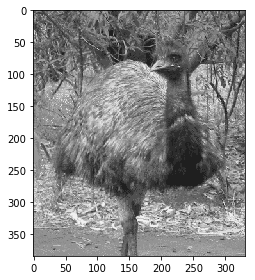

In [10]:
emu_gray = rgb2gray(emu)
print(f"type: {emu_gray.dtype}")
imshow(emu_gray)

**3. Enter the command**

```python
import skimage.util as ut
e2 = ut.img_as_ubyte(e)
```

**and view the output.  
What does the function `img_as_ubyte` do? What affect does it have on  
(a) The appearance of the image?  
(b) The elements of the image matrix?**

`img_as_ubyte` - Convert an image to 8-bit unsigned integer format.

(a) The appearance of the image does not change.

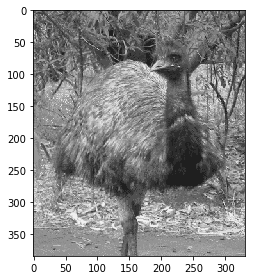

In [11]:
emu_gray_uint8 = img_as_ubyte(emu_gray)
imshow(emu_gray_uint8)

(b) The elements of the image matrix change from float64 to uint8.

In [12]:
print(f"Origianl element: {emu_gray.dtype}")
print(f"New element:      {emu_gray_uint8.dtype}")

Origianl element: float64
New element:      uint8


**4. What happens if you apply that function to the cameraman image?**

(a) The appearance of the image does not change.  
(b) The elements of the image matrix does not change.

Origianl element: uint8
New element:      uint8


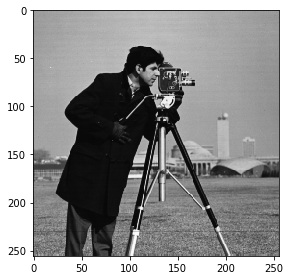

In [13]:
cameraman_uint8 = img_as_ubyte(cameraman)
print(f"Origianl element: {cameraman.dtype}")
print(f"New element:      {cameraman_uint8.dtype}")
imshow(cameraman_uint8)

**5. Experiment with reducing spatial resolution of the following images:  
(a) `cameraman.png`  
(b) The grayscale emu image  
(c) `blocks.png`  
(d) `buffalo.png`**

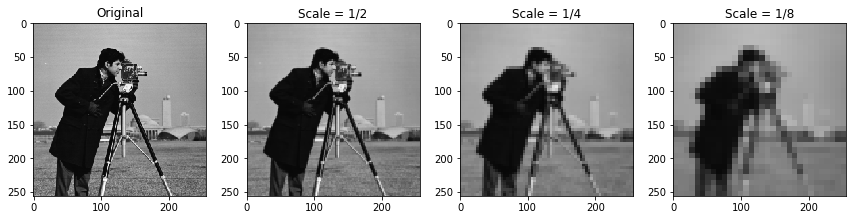

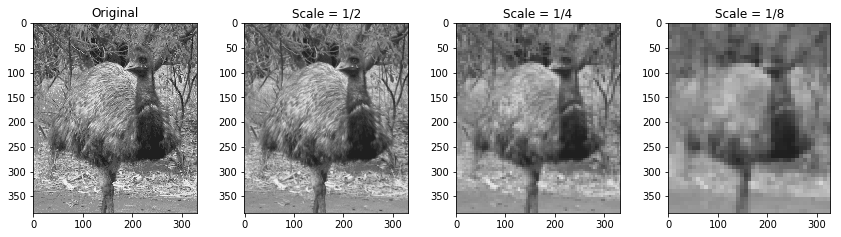

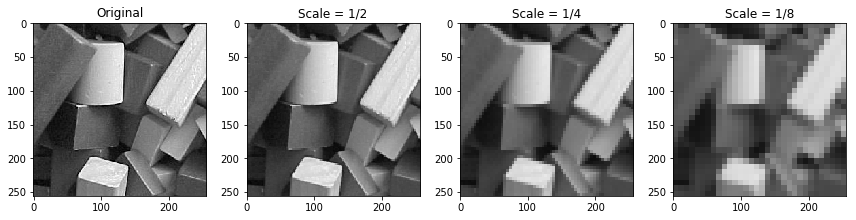

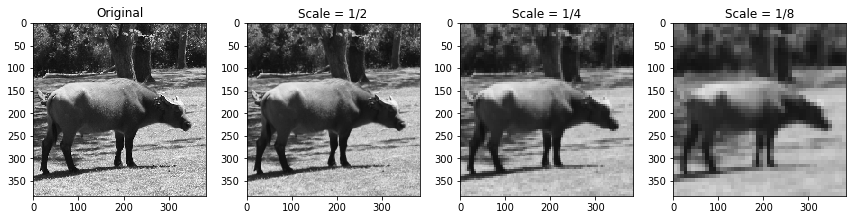

In [14]:
for i, image in enumerate([cameraman, emu_gray, blocks, buffalo]):
    plt.figure(figsize=(12, 12))
    
    plt.subplot(4, 4, 4 * i + 1)
    plt.title("Original")
    imshow(image)

    plt.subplot(4, 4, 4 * i + 2)
    plt.title("Scale = 1/2")
    imshow(spatial_resolution(image, 2))

    plt.subplot(4, 4, 4 * i + 3)
    plt.title("Scale = 1/4")
    imshow(spatial_resolution(image, 4))

    plt.subplot(4, 4, 4 * i + 4)
    plt.title("Scale = 1/8")
    imshow(spatial_resolution(image, 8))

**6. Experiment with reducing the quantization levels of the images in the previous question. Note the point  at which the image becomes seriously degraded. Is this the same for all images, or can some images stand lower levels of quentization than others?**

**Check your hypothesis with some other grayscale images.**

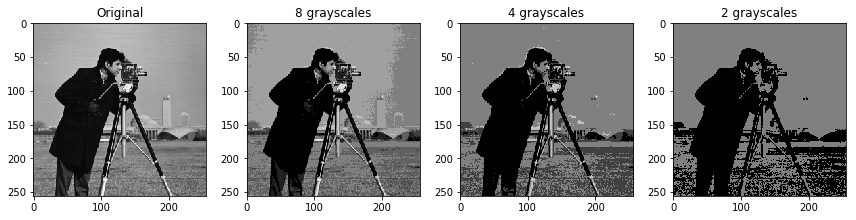

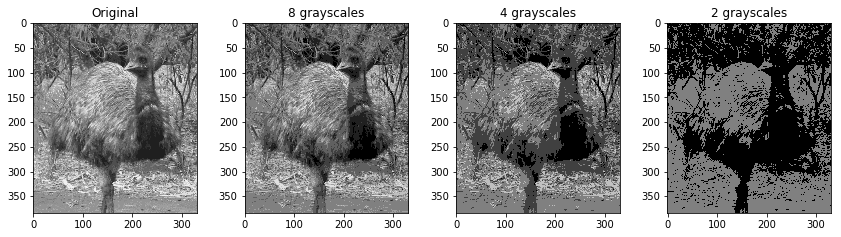

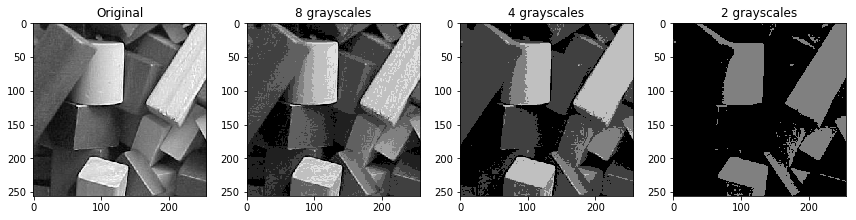

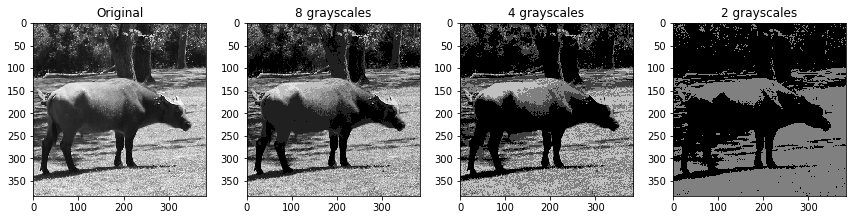

In [15]:
for i, image in enumerate([cameraman, emu_gray, blocks, buffalo]):
    plt.figure(figsize=(12, 12))
    
    plt.subplot(4, 4, 4 * i + 1)
    plt.title("Original")
    imshow(image)

    plt.subplot(4, 4, 4 * i + 2)
    plt.title("8 grayscales")
    imshow(grayslice(image, 8))

    plt.subplot(4, 4, 4 * i + 3)
    plt.title("4 grayscales")
    imshow(grayslice(image, 4))

    plt.subplot(4, 4, 4 * i + 4)
    plt.title("2 grayscales")
    imshow(grayslice(image, 2))

當影像使用的像素分佈愈分散時，愈能抵抗高強度的量化。

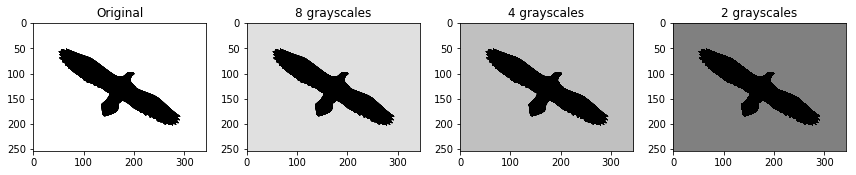

In [16]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 4, 1)
plt.title("Original")
imshow(eagle)

plt.subplot(4, 4, 2)
plt.title("8 grayscales")
imshow(grayslice(eagle, 8))

plt.subplot(4, 4, 3)
plt.title("4 grayscales")
imshow(grayslice(eagle, 4))

plt.subplot(4, 4, 4)
plt.title("2 grayscales")
imshow(grayslice(eagle, 2))

## Chapter 4 Exercise

**2. Enter the following command on the blocks image b:**

```python
b2 = (b/64)*64
```

**Comment on the result. Why is the result not equivalent to the original image?** 

上述的程式碼對影像作量化的動作，也就是用較少的顏色種類來表現原來影像，結果當然不相同。

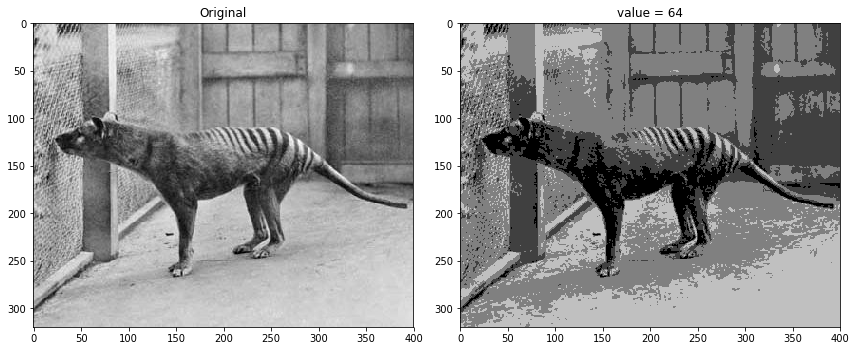

In [17]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.title("Original")
imshow(thylacine)

plt.subplot(1, 2, 2)
plt.title("value = 64")
imshow(grayslice(thylacine, 4))

**3. Replace the value 64 in the previous question with 32 and 16.**

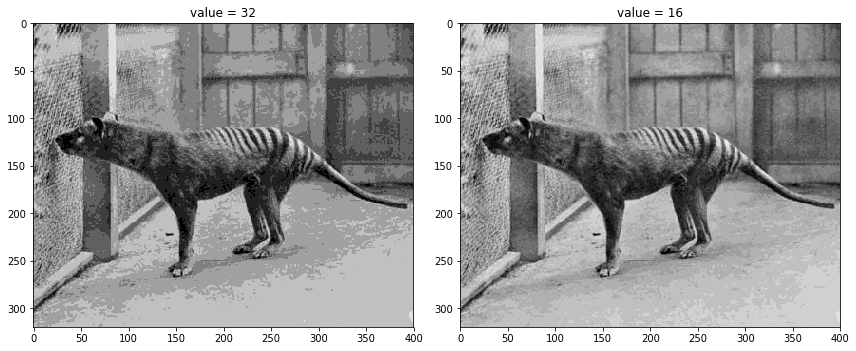

In [18]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.title("value = 32")
imshow(grayslice(thylacine, 8))

plt.subplot(1, 2, 2)
plt.title("value = 16")
imshow(grayslice(thylacine, 16))

**5. The following table gives the number of pixels at each of the gray levels 0-7 in an image with those gray values only:**
 
| 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    |  
|------|------|------|------|------|------|------|------|  
| 3244 | 3899 | 4559 | 2573 | 1428 | 530  | 101  | 50   |

**Draw the histogram correspoding to these gray levels, and then perform a historgram equlization and draw the resulting histogram.**

In [31]:
def hist(image, weights, equal=False):
    if equal:
        total = 0
        mul = (weights.size - 1) / sum(weights)
        for i, v in enumerate(weights):
            total += v
            image[i] = total * mul              
    plt.hist(image, weights=weights)

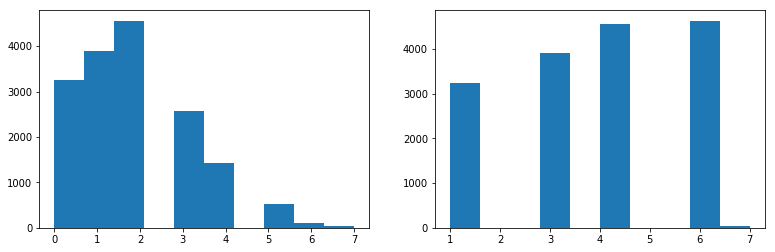

In [32]:
table_4_5 = array([3244, 3899, 4559, 2573, 1428, 530, 101, 50], dtype=int64)

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
hist(arange(8), weights=table_4_5)

plt.subplot(1, 2, 2)
hist(arange(8), weights=table_4_5, equal=True)

**7. The following small image has gray values in the range 0 to 19. Compute the gray level histogram and the mapping that will equalize this histogram. Produce an 8 x 8 grid containing the gray values for the new histogram-equlized image.**
```
12   6   5  13  14  14  16  15    
11  10   8   5   8  11  14  14  
 9   8   3   4   7  12  18  19  
10   7   4   2  10  12  13  17  
16   9  13  13  16  19  19  17  
12  10  14  15  18  18  16  14  
11   8  10  12  14  13  14  15  
 8   6   3   7   9  11  12  12  
```

In [21]:
def imhist(image, bins=256, equal=False):
    if equal:
        image = equalize_hist(image) * (bins - 1)
    plt.hist(image.flatten(), bins="auto")

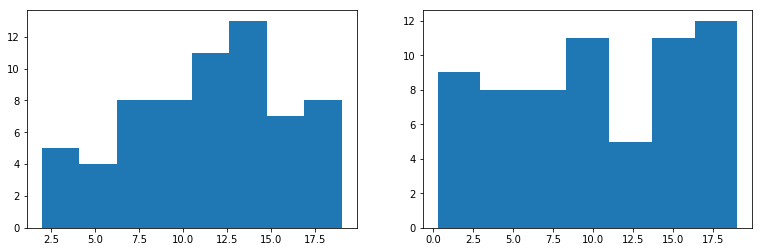

In [22]:
table_4_7 = array([
    [12, 6, 5, 13, 14, 14, 16, 15],
    [11, 10, 8, 5, 8, 11, 14, 14],
    [9, 8, 3, 4, 7, 12, 18, 19],
    [10, 7, 4, 2, 10, 12, 13, 17],
    [16, 9, 13, 13, 16, 19, 19, 17],
    [12, 10, 14, 15, 18, 18, 16, 14],
    [11, 8, 10, 12, 14, 13, 14, 15],
    [8, 6, 3, 7, 9, 11, 12, 12]
])


plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
imhist(table_4_7, 20)

plt.subplot(1, 2, 2)
imhist(table_4_7, 20, True)

**8. Is the histogram equalization operation idempotent? That is, is performing histogram equalization `twice` the same as doing it just once?**

Yes, if histogram equalization is applied twice, there is no change.

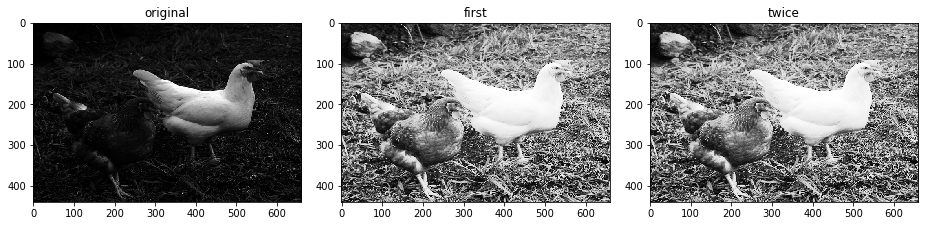

In [23]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 3, 1)
plt.title("original")
imshow(chickens)

plt.subplot(1, 3, 2)
plt.title("first")
imshow(equalize_hist(chickens))

plt.subplot(1, 3, 3)
plt.title("twice")
imshow(equalize_hist(equalize_hist(chickens)))

**10. Create a dark image with**

```
c = imread("cameraman.png");
[x, map] = gray2ind(c);
```

**The matrix x, when viewed, will appear as a very dark version of the cameraman image. Apply histogram equalization to it and compare the result with the original image.**

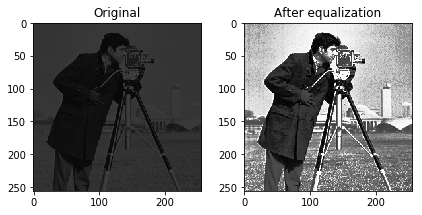

In [24]:
x = imread("x.png")
plt.subplot(1, 2, 1)
plt.title("Original")
imshow(x)

plt.subplot(1, 2, 2)
plt.title("After equalization")
imshow(equalize_hist(x))

**11. Using either `c` and `ch or s` and `sh` from Section 4.3, enter the command**

```python
plt.plot(c, ch, '.')
plt.grid('on')
plt.axis('image')
```

**What are you seeing here?**

顏色較暗的部份在經過histogram equalization後，會mapping到比原來大的顏色範圍，因此增強顏色的對比程度。

(-12.75, 267.75, -4.350000000000001, 267.35)

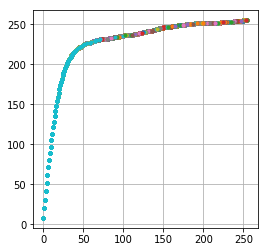

In [25]:
ch = img_as_ubyte(equalize_hist(chickens))
plt.plot(chickens, ch, ".") # Plot y versus x as lines and/or markers.
plt.grid(True)              # Configure the grid lines.
plt.axis("image")           # Convenience method to get or set some axis properties.

(-0.04164343137254903,
 0.8931732352941177,
 -0.049459810184900796,
 1.0499742766754714)

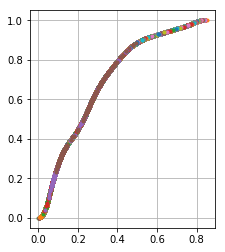

In [26]:
s = rgb2gray(sunset)
sh = equalize_hist(s)
plt.plot(s, sh, ".")        # Plot y versus x as lines and/or markers.
plt.grid(True)              # Configure the grid lines.
plt.axis("image")           # Convenience method to get or set some axis properties.